<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/daniel.frumlacher/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# Placeholder:
Everthing that is passed to or handed out of the graph (input output tensors)
# Variable
Everthing within the network, tensors that represent parameters

# Introduction

```
# This is formatted as code
```


Before we jump into Tensorflow, we will implemented our first neural network model using Python Numpy package. NumPy is the fundamental package for scientific computing with Python, such as:

1. Linear Algebra
2. Statistics
3. Calculus

## A brief intro to Numpy operations:

1. Creating a Vector:
Here we use Numpy to create a 1-D Array which we then call a vector.





In [0]:
#Load Library
import numpy as np

#Create a vector as a Row
vector_row = np.array([1,2,3])

#Create vector as a Column
vector_column = np.array([[1],[2],[3]])

2. Creating a Matrix
We Create a 2-D Array in Numpy and call it a Matrix. It contains 2 rows and 3 columns.

In [0]:
#Load Library
import numpy as np

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6]])
print(matrix)

3. Selecting Elements


In [0]:
#Load Library
import numpy as np

#Create a vector as a Row
vector_row = np.array([ 1,2,3,4,5,6 ])

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix)

#Select 3rd element of Vector
print(vector_row[2])

#Select 2nd row 2nd column
print(matrix[1,1])
#Select all elements of a vector
print(vector_row[:])
#Select everything up to and including the 3rd element
print(vector_row[:3])
#Select the everything after the 3rd element
print(vector_row[3:])
#Select the last element
print(vector_row[-1])
#Select the first 2 rows and all the columns of the matrix
print(matrix[:2,:])
#Select all rows and the 2nd column of the matrix
print(matrix[:,1:2])


4. Describing a Matrix

In [0]:
import numpy as np


#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
#View the Number of Rows and Columns
print(matrix.shape)
#View the number of elements (rows*columns)
print(matrix.size)
#View the number of Dimensions(2 in this case)
print(matrix.ndim)

5. Finding the max and min values

In [0]:
#Load Library
import numpy as np

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix)
#Return the max element
print(np.max(matrix))
#Return the min element
print(np.min(matrix))
#To find the max element in each column
print(np.max(matrix,axis=0))
#To find the max element in each row
print(np.max(matrix,axis=1))

6. Reshaping Arrays


In [0]:
#Load Library
import numpy as np

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix)
#Reshape
print(matrix.reshape(9,1))
#Here -1 says as many columns as needed and 1 row
print(matrix.reshape(1,-1))
#If we provide only 1 value Reshape would return a 1-d array of that length
print(matrix.reshape(9))
#We can also use the Flatten method to convert a matrix to 1-d array
print(matrix.flatten())

7. Calculating Dot Products

In [0]:
#Load Library
import numpy as np

#Create vector-1
vector_1 = np.array([ 1,2,3 ])
#Create vector-2
vector_2 = np.array([ 4,5,6 ])
#Calculate Dot Product
print(np.dot(vector_1,vector_2))
#Alternatively you can use @ to calculate dot products
print(vector_1 @ vector_2)

##Linear regression in Numpy:

---



Write the numpy code for the following model:

$Y=WX+B$

where $X$ is 3x10 matrix:  10 samples and 3 features

$Y$ is 4x10 matrix: 10 samples and 4 outputs

$W$ is the weights matrix with the shape 4x3: connecting 3 inputs to 4 outputs

$b$ is a vector with a size 4 ( one bias per output)


In [0]:
#Load Library
import numpy as np

# Generate a random X (we do not have a real data)
X = np.random.rand(3,10)
display(X.shape)

# Generate a random weights vector
W = np.random.rand(4,3)

# Generate a random bias 
b = np.random.rand(4,1)

# Calculate Y
Y= np.dot(W,X) + b
display(Y.shape)


## One neuron model in numpy:

A single neuron has multiple inputs and one output, in addition to the linear regression model, we need to add non linearity through an activation function:

$Y= f(WX+B)$

where $X$ is n x m matrix:  m samples and n features/inputs

$f(g)= \frac{1}{1+\exp(-g)}$  is a sigmoid acitavation function

$Y$ is nh1 x m matrix: m samples and ny outputs

$W$ is the weights matrix with the shape nh1 x n: connecting 3 inputs to 4 outputs

$b$ is a vector with a size nh1 ( one bias per output)





In [0]:
# load Library
import numpy as np 

f = lambda x: 1.0/(1.0 + np.exp(-x)) # activation function (use sigmoid)

# Generate a random X (we do not have a real data)
X = np.random.rand(3,10)


# Generate a random weights vector
W = np.random.rand(1,3)


# Generate a random bias 
b = np.random.rand()

# Calculate Y
Y= f(np.dot(W,X) + b)
display(Y)


## One hidden layer model in numpy:

The difference from the one neuron model is simple:  we need only to change the number of output "ny"

In [0]:
# load Library
import numpy as np 

#Suppose we have the following NN architecture

m = 10 # Number of samples
ni= 3 # Number of input neurons
h = 1 # Number of hidden layers
nh1 = 4 # Number of neurons in the hidden layer 1
no =1 # Number of neurons in the output layer



f = lambda x: 1.0/(1.0 + np.exp(-x)) # activation function (use sigmoid)

# Generate a random X (we do not have a real data)
X = np.random.rand(ni,m)


# Generate a random weights vector for the first hidden layer
W1 = np.random.rand(nh1,ni)


# Generate a random bias for the first hidden layer 
b1 = np.random.rand(nh1,1)

# Generate a random weights vector for the output layer
W2 = np.random.rand(no,nh1)

# Generate a random bias for the output layer 
b2 = np.random.rand(no,1)

# Calculate output of the first hidden layer
Yh1= f(np.dot(W1,X) + b1)

# Calculate output of the output layer

Y= f(np.dot(W2,Yh1) + b2)

display(Yh1.shape)
display(Y.shape)

## Gradient descent in Numpy:
Let us now start training a neural network
We start by implementing a simple gradient descent for linear regression

In [0]:
converged = False
iter = 0
m = 10 # Number of samples
ni= 1 # Number of input neurons
h = 1 # Number of hidden layers
no =1 # Number of neurons in the output layer

# Generate a random X (we do not have a real data)
X = np.random.rand(m)
display(X)

# learning rate
alpha =0.01

# early stop criteria 
ep=0.001

# maximum number of training iterations
max_iter=100

# Generate a random weights vector for the output layer
W1 = np.random.rand()

# Generate a random bias for the output layer 
b1 = np.random.rand()

# Generate a random ground truth
Y_gr = np.random.rand(m)


J = sum([(b1 + W1*X[i] - Y_gr[i])**2 for i in range(m)])

while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(b1 + W1*X[i] - Y_gr[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(b1 + W1*X[i] - Y_gr[i])*X[i] for i in range(m)])
        
        # update the theta_temp
        temp0 = W1 - alpha * grad0
        temp1 = b1 - alpha * grad1
        # update theta
        W1 = temp0
        b1 = temp1
        
        # sum squared error
        e = sum([(b1 + W1*X[i] - Y_gr[i])**2 for i in range(m)]) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

# Backpropagation using TensorFlow

In [2]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)


Instructions for updating:
Colocations handled automatically by placer.
iter:  0 cost:  1.4175907
iter:  1 cost:  1.4144883
iter:  2 cost:  1.4113903
iter:  3 cost:  1.4082968
iter:  4 cost:  1.4052079
iter:  5 cost:  1.4021236
iter:  6 cost:  1.3990438
iter:  7 cost:  1.3959692
iter:  8 cost:  1.3928993
iter:  9 cost:  1.3898342
predicted  [[-0.7621291   1.780424   -1.5030565   1.6475219 ]
 [-0.17885092  1.4736573  -0.56844485  1.0309389 ]
 [-0.86771536  0.47043604 -1.1209204   0.6527457 ]
 [-0.47498628  1.1091056  -0.8129021   0.90237707]
 [-0.6720712   1.6330141  -1.5905117   1.7441837 ]
 [-0.8856142  -0.06108102 -1.0760844   0.37867796]
 [-0.978383    1.6328518  -0.91661847  0.8346108 ]
 [-0.4273892   1.5413274  -1.0177056   1.319275  ]
 [-0.6773295   1.1039684  -1.0817921   1.0155648 ]
 [-0.7285267   0.55313706 -1.3534287   1.0256313 ]]
real  [[0.74065826 0.50525302 0.33952691 0.06522299]
 [0.25433794 0.41436334 0.24421289 0.82205699]
 [0.10716994 0.19740498 0.43589085 0.31679118]

In [9]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1 = 4
num_h2 = 10
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1 ]))
w_2 = tf.Variable(tf.random_normal([num_h1,num_h2 ]))
w_3 = tf.Variable(tf.random_normal([num_h2,num_outputs ]))

# bias
b_1 = tf.Variable(tf.random_normal([num_h1]))
b_2 = tf.Variable(tf.random_normal([num_h2]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))

# model
h1 =  tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1))
h2 =  tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2))
y_p = tf.add(tf.matmul(h2, w_3),b_3) # Linear for regression


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)


iter:  0 cost:  4.361949
iter:  1 cost:  4.3282504
iter:  2 cost:  4.2947483
iter:  3 cost:  4.261443
iter:  4 cost:  4.2283387
iter:  5 cost:  4.1954374
iter:  6 cost:  4.162743
iter:  7 cost:  4.1302567
iter:  8 cost:  4.0979805
iter:  9 cost:  4.065917
predicted  [[ 1.1124476  -1.1370611  -0.9594238   4.009957  ]
 [ 1.2826313  -0.81842005 -1.0381099   3.8812432 ]
 [ 1.1951283  -1.0072632  -0.9955863   3.9577188 ]
 [ 1.1461836  -1.0493187  -1.0017484   3.9804971 ]
 [ 1.2800597  -0.8826567  -1.0063277   3.8971293 ]
 [ 1.195378   -0.91466475 -1.020069    3.8870304 ]
 [ 1.2734107  -0.79594886 -1.0396938   3.8517714 ]
 [ 1.1351516  -1.127572   -0.95994985  4.0035515 ]
 [ 1.2380377  -0.91057956 -0.9901669   3.9083452 ]
 [ 1.1077546  -1.1044526  -1.0109493   4.0081306 ]]
real  [[0.77502977 0.64500902 0.39160031 0.7146733 ]
 [0.04174413 0.36595717 0.28324725 0.83141959]
 [0.99034627 0.73360818 0.41267314 0.84375424]
 [0.76158312 0.65198077 0.00324331 0.0398779 ]
 [0.87222748 0.44684906 0.35

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


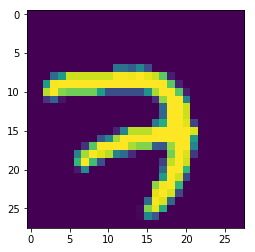

In [11]:
import tensorflow as tf
from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

mnist.train.images.shape

image=mnist.train.images[0].reshape((28,28))
imshow(image)

print(mnist.train.labels[0])


In [14]:
# Training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# Training data
X_test = mnist.test.images
Y_test = mnist.test.labels

# Training data
X_valid = mnist.validation.images
Y_valid = mnist.validation.labels

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1 = 100
num_h2 = 100
num_outputs = 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1 ]))
w_2 = tf.Variable(tf.random_normal([num_h1,num_h2 ]))
w_3 = tf.Variable(tf.random_normal([num_h2,num_outputs ]))

# bias
b_1 = tf.Variable(tf.random_normal([num_h1]))
b_2 = tf.Variable(tf.random_normal([num_h2]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))

# model
h1 =  tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1))
h2 =  tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2))
y_p = tf.add(tf.matmul(h2, w_3),b_3) # SOftmax Normalising to 0 and 1

# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # Cross entropy is a way to compare two distributions to each other
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1)) # check if value on left and right are the same
## 5 imaged, y_p=[[0.1,0,0,0,0.9],[0.15,0,0,0,0.85],[0.05,0,0.9,0,0.05]] --> tf.argmax gives [4,4,2]
## tf.equal compares match between y and y_pred [1, 0,1] --> tf.reduce_mean --> 2/3
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
    
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        

        training_cost, train_acc = sess.run([cost, accuracy], feed_dict={x: batch_x,y: batch_y})
    
        print('iter: ',i, 'train_cost: ', training_cost,'acc: ',train_acc)
      
        batch_x, batch_y = mnist.test.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        test_cost, test_acc = sess.run([cost, accuracy], feed_dict={x: batch_x,y: batch_y})
        
        print('iter: ',i, 'test_cost: ', test_cost,'test_acc: ',test_acc)
    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)


iter:  0 train_cost:  12.1633005 acc:  0.1171875
iter:  0 test_cost:  10.170123 test_acc:  0.1171875
iter:  1 train_cost:  10.779123 acc:  0.1171875
iter:  1 test_cost:  9.451231 test_acc:  0.1015625
iter:  2 train_cost:  9.376812 acc:  0.15625
iter:  2 test_cost:  10.090677 test_acc:  0.1015625
iter:  3 train_cost:  9.26306 acc:  0.1015625
iter:  3 test_cost:  9.088151 test_acc:  0.1015625
iter:  4 train_cost:  8.5663595 acc:  0.125
iter:  4 test_cost:  8.756022 test_acc:  0.0703125
iter:  5 train_cost:  7.2865896 acc:  0.140625
iter:  5 test_cost:  8.100397 test_acc:  0.1015625
iter:  6 train_cost:  7.4501977 acc:  0.1328125
iter:  6 test_cost:  7.405367 test_acc:  0.0703125
iter:  7 train_cost:  7.270867 acc:  0.1328125
iter:  7 test_cost:  6.6241026 test_acc:  0.1484375
iter:  8 train_cost:  6.860054 acc:  0.0859375
iter:  8 test_cost:  6.4238305 test_acc:  0.1171875
iter:  9 train_cost:  6.9041862 acc:  0.0859375
iter:  9 test_cost:  6.206033 test_acc:  0.1484375
iter:  10 train_c

##Assignment 1
### Backpropagation in Numpy:
